# EDA del Registro de Defunciones 2023

En este notebook exploramos a fondo el dataset de defunciones generales de Ecuador (archivo CSV 2023).

La idea es entender:
- Qué variables hay y qué significan.
- Cómo se distribuyen las muertes por territorio, tiempo y características de las personas.
- Cómo se registran las causas de muerte.
- Qué posibles problemas de calidad de datos existen (años raros, valores faltantes, valores como `9999/99/99`, etc.).

Todavía **no vamos a limpiar** el dataset. Solo vamos a observar y describir qué hay, para luego tomar buenas decisiones de limpieza y de diseño del estudio.

## 1. Importación de librerías y configuración inicial

En esta sección cargamos las librerías que vamos a usar, configuramos estilos de gráficos y definimos la ruta al archivo CSV dentro del proyecto.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
sns.set(style='whitegrid')

pd.set_option('display.max_colwidth', 120)

PROJECT_ROOT = Path('..').resolve()
DATA_RAW = PROJECT_ROOT / 'data' / 'raw'
csv_path = DATA_RAW / 'INEC_DEFUNCIONESGENERALES_2023.csv'
csv_path

WindowsPath('D:/Archivos de Usuario/Documents/defunciones-fl-ec/data/raw/INEC_DEFUNCIONESGENERALES_2023.csv')

## 2. Cargar el dataset

Cargamos el CSV usando `utf-8-sig` para evitar problemas de codificación.
Leemos todas las columnas como texto (`str`) para no perder información ni forzar tipos antes de tiempo.

In [2]:
df = pd.read_csv(
    csv_path,
    sep=';',
    encoding='utf-8-sig',
    dtype=str
)
df.head()

,Numeración,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,...,area_res,est_civil,niv_inst,residente,causa,lc1,causa103,causa80,causa67A,causa67B
0,1,Guayas,Naranjal,Naranjal,2024,Enero,25,25/1/2024,Ecuatoriana,Ecuador,...,Urbano,Viudo (a),Secundaria,No residente,I63 Infarto cerebral,42 Enfermedades cerebrovasculares,069 Enfermedades Cerebro vasculares,055 Enfermedades cerebro vasculares,030 Enfermedades del sistema circulatorio,030 Enfermedades del sistema circulatorio
1,2,Imbabura,Otavalo,Jordán,2023,Noviembre,27,27/11/2023,Ecuatoriana,Ecuador,...,Urbano,Viudo (a),Educación Básica,Residente,I27 Otras enfermedades cardiopulmonares,36 Enfermedad cardiopulmonar y enfermedad de la circulación pulmonar,068 Otras enfermedades del corazón,054 Otras Enfermedades del corazón,030 Enfermedades del sistema circulatorio,030 Enfermedades del sistema circulatorio
2,3,Cotopaxi,Latacunga,La Matriz,2023,Agosto,4,4/8/2023,Ecuatoriana,Ecuador,...,Rural,Viudo (a),Educación Básica,Residente,I62 Otras hemorragias intracraneales no traumáticas,42 Enfermedades cerebrovasculares,069 Enfermedades Cerebro vasculares,055 Enfermedades cerebro vasculares,030 Enfermedades del sistema circulatorio,030 Enfermedades del sistema circulatorio
3,4,Esmeraldas,Ríoverde,Rocafuerte,2023,Octubre,9,9/10/2023,Ecuatoriana,Ecuador,...,Urbano,Viudo (a),Sin información,Residente,K74 Fibrosis y cirrosis del hígado,51 Cirrosis y otras enfermedades del hígado,080 Enfermedades del hígado,064 Enfermedades del hígado,035 Enfermedades del sistema digestivo,035 Enfermedades del sistema digestivo
4,5,Pichincha,Quito,La Merced,2023,Septiembre,28,28/9/2023,Ecuatoriana,Ecuador,...,Urbano,Viudo (a),Ninguno,Residente,J13 Neumonía debida a Streptococcus pneumoniae,46 Influenza y neumonía,074 Neumonia,059 Neumonia,031 Enfermedades del sistema respiratorio,032 Neumonía


## 3. Dimensiones, columnas y tipos de datos

Aquí vemos:
- Cuántas filas (registros de defunciones) hay.
- Cuántas columnas y cómo se llaman.
- Qué tipo de dato se detectó para cada columna (ahora todo es texto).

In [3]:
df.shape

(89877, 45)

In [4]:
df.columns

Index(['Numeración', 'prov_insc', 'cant_insc', 'parr_insc', 'anio_insc',
       'mes_insc', 'dia_insc', 'fecha_insc', 'nac_fall', 'cod_pais', 'sexo',
       'anio_nac', 'mes_nac', 'dia_nac', 'fecha_nac', 'anio_fall', 'mes_fall',
       'dia_fall', 'fecha_fall', 'cod_edad', 'edad', 'prov_res', 'sabe_leer',
       'etnia', 'lugar_ocur', 'prov_fall', 'cant_fall', 'parr_fall',
       'muj_fertil', 'mor_viol', 'lug_viol', 'autopsia', 'causa4', 'cer_por',
       'area_fall', 'area_res', 'est_civil', 'niv_inst', 'residente', 'causa',
       'lc1', 'causa103', 'causa80', 'causa67A', 'causa67B'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89877 entries, 0 to 89876
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Numeración  89877 non-null  object
 1   prov_insc   89877 non-null  object
 2   cant_insc   89877 non-null  object
 3   parr_insc   89877 non-null  object
 4   anio_insc   89877 non-null  object
 5   mes_insc    89877 non-null  object
 6   dia_insc    89877 non-null  object
 7   fecha_insc  89877 non-null  object
 8   nac_fall    89877 non-null  object
 9   cod_pais    89877 non-null  object
 10  sexo        89877 non-null  object
 11  anio_nac    89877 non-null  object
 12  mes_nac     89877 non-null  object
 13  dia_nac     89877 non-null  object
 14  fecha_nac   89877 non-null  object
 15  anio_fall   89877 non-null  object
 16  mes_fall    89877 non-null  object
 17  dia_fall    89877 non-null  object
 18  fecha_fall  89877 non-null  object
 19  cod_edad    89877 non-null  object
 20  edad  

## 4. Descripción general de las columnas

En esta sección usamos un resumen general para ver:
- Cuántos valores distintos hay por columna.
- Cuáles son los valores más frecuentes.
- Si hay columnas con muchos valores únicos (como IDs o textos largos).

In [6]:
resumen_general = df.describe(include='all').T
resumen_general

,count,unique,top,freq
Numeración,89877,89877,89877,1
prov_insc,89877,25,Guayas,24241
cant_insc,89877,167,Guayaquil,17673
parr_insc,89877,205,Rocafuerte,16511
anio_insc,89877,4,2023,89329
mes_insc,89877,13,Mayo,8055
dia_insc,89877,32,27,3523
fecha_insc,89877,398,6/11/2023,605
nac_fall,89877,3,Ecuatoriana,87844
cod_pais,89877,56,Ecuador,87844


## 5. Agrupar columnas por tipo de información

Vamos a agrupar las columnas según el tipo de información que representan. Esto nos ayuda a tener una idea clara del contenido del dataset.

- **Identificación y registro:** numeración y datos de inscripción.
- **Datos demográficos:** sexo, edad, etnia, nivel educativo, estado civil, saber leer, etc.
- **Territorio:** provincia/cantón/parroquia de inscripción, residencia y fallecimiento, área urbana/rural.
- **Circunstancias de la muerte:** lugar, si fue muerte violenta, si hubo autopsia, etc.
- **Fechas:** nacimiento, fallecimiento, año/mes/día.
- **Causas de muerte:** código detallado y agrupaciones (causa, causa103, causa80, causa67A/B).

In [7]:
columnas_identificacion = ['Numeración']
columnas_inscripcion = ['prov_insc', 'cant_insc', 'parr_insc', 'anio_insc', 'mes_insc', 'dia_insc', 'fecha_insc']
columnas_demograficas = ['sexo', 'nac_fall', 'cod_pais', 'cod_edad', 'edad', 'sabe_leer', 'etnia', 'muj_fertil',
                         'est_civil', 'niv_inst', 'residente']
columnas_residencia = ['prov_res']
columnas_fallecimiento_territorio = ['prov_fall', 'cant_fall', 'parr_fall', 'area_fall', 'area_res']
columnas_fallecimiento_tiempo = ['anio_nac', 'mes_nac', 'dia_nac', 'fecha_nac',
                                 'anio_fall', 'mes_fall', 'dia_fall', 'fecha_fall']
columnas_circunstancias = ['lugar_ocur', 'mor_viol', 'lug_viol', 'autopsia', 'cer_por']
columnas_causas = ['causa4', 'causa', 'lc1', 'causa103', 'causa80', 'causa67A', 'causa67B']

grupos_columnas = {
    'Identificación': columnas_identificacion,
    'Inscripción': columnas_inscripcion,
    'Demográficas': columnas_demograficas,
    'Residencia': columnas_residencia,
    'Fallecimiento territorio': columnas_fallecimiento_territorio,
    'Fallecimiento tiempo': columnas_fallecimiento_tiempo,
    'Circunstancias': columnas_circunstancias,
    'Causas': columnas_causas,
}
grupos_columnas

{'Identificación': ['Numeración'],
 'Inscripción': ['prov_insc',
  'cant_insc',
  'parr_insc',
  'anio_insc',
  'mes_insc',
  'dia_insc',
  'fecha_insc'],
 'Demográficas': ['sexo',
  'nac_fall',
  'cod_pais',
  'cod_edad',
  'edad',
  'sabe_leer',
  'etnia',
  'muj_fertil',
  'est_civil',
  'niv_inst',
  'residente'],
 'Residencia': ['prov_res'],
 'Fallecimiento territorio': ['prov_fall',
  'cant_fall',
  'parr_fall',
  'area_fall',
  'area_res'],
 'Fallecimiento tiempo': ['anio_nac',
  'mes_nac',
  'dia_nac',
  'fecha_nac',
  'anio_fall',
  'mes_fall',
  'dia_fall',
  'fecha_fall'],
 'Circunstancias': ['lugar_ocur',
  'mor_viol',
  'lug_viol',
  'autopsia',
  'cer_por'],
 'Causas': ['causa4',
  'causa',
  'lc1',
  'causa103',
  'causa80',
  'causa67A',
  'causa67B']}

## 6. Valores únicos por columna

Aquí contamos cuántos valores distintos hay en cada columna. Esto nos ayuda a ver:
- Qué columnas parecen categóricas (pocos valores diferentes).
- Qué columnas parecen casi identificadores (muchos valores distintos).
- Dónde puede haber codificaciones especiales (como `9999/99/99`).

In [8]:
n_unique = df.nunique(dropna=False).sort_values(ascending=False)
n_unique

Numeración    89877
fecha_nac     30027
causa4         2439
fecha_fall     1419
parr_fall      1108
causa           875
fecha_insc      398
cant_fall       220
parr_insc       205
cant_insc       167
anio_nac        139
edad            117
anio_fall        89
causa103         84
causa80          73
lc1              69
cod_pais         56
causa67B         54
dia_nac          32
dia_insc         32
dia_fall         31
prov_res         25
prov_insc        25
prov_fall        24
causa67A         17
mes_nac          13
mes_insc         13
mes_fall         12
niv_inst         11
lug_viol         11
etnia             9
muj_fertil        9
lugar_ocur        8
est_civil         8
mor_viol          7
cer_por           5
cod_edad          5
autopsia          4
sabe_leer         4
anio_insc         4
nac_fall          3
sexo              2
area_fall         2
area_res          2
residente         2
dtype: int64

## 7. Años de fallecimiento y años de inscripción

Aunque el archivo es "Defunciones 2023", queremos ver qué otros años aparecen:
- En `anio_fall` (año en que ocurrió la muerte).
- En `anio_insc` (año en que se inscribió la defunción).

Esto nos muestra posibles arrastres de años anteriores o retrasos en el registro.

In [9]:
df['anio_fall'].value_counts(dropna=False).sort_index()

anio_fall
1898        1
1912        1
1916        1
1920        1
1925        1
        ...  
2019       34
2020      172
2021      160
2022     1247
2023    87733
Name: count, Length: 89, dtype: int64

In [10]:
df['anio_insc'].value_counts(dropna=False).sort_index()

anio_insc
          331
2022        1
2023    89329
2024      216
Name: count, dtype: int64

## 8. Edades y codificación de edad

La edad es clave para casi cualquier análisis. Aquí:
- Vemos cómo se codifica la edad (`cod_edad`: años, meses, días, etc.).
- Convertimos `edad` a número para poder hacer histogramas.
- Exploramos la distribución de edades, sabiendo que luego decidiremos cómo tratar edades raras o casos especiales.

In [11]:
df['cod_edad'].value_counts(dropna=False)

cod_edad
Años               87086
Días                1297
Meses               1046
Horas                371
Sin información       77
Name: count, dtype: int64

In [12]:
edad_num = pd.to_numeric(df['edad'], errors='coerce')
edad_num.describe()

count    89800.000000
mean        62.936893
std         25.383086
min          0.000000
25%         45.000000
50%         69.000000
75%         83.000000
max        120.000000
Name: edad, dtype: float64

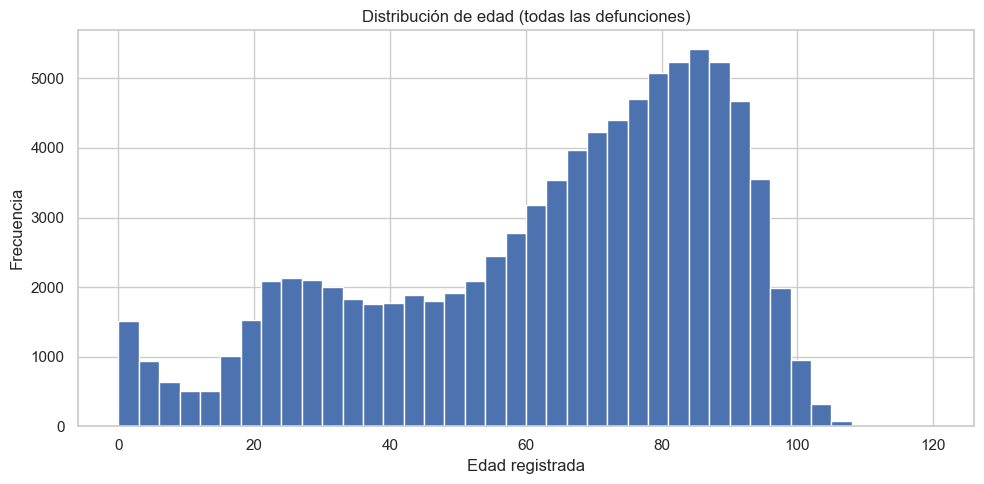

In [13]:
plt.figure(figsize=(10,5))
edad_num.plot(kind='hist', bins=40)
plt.title('Distribución de edad (todas las defunciones)')
plt.xlabel('Edad registrada')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

También podemos ver la edad resumida por grupos de codificación de edad. Esto ayuda a detectar inconsistencias, como edades muy altas con códigos extraños.

In [14]:
edad_por_cod = pd.DataFrame({
    'cod_edad': df['cod_edad'],
    'edad_num': edad_num
})
edad_por_cod.groupby('cod_edad')['edad_num'].describe()

,count,mean,std,min,25%,50%,75%,max
cod_edad,,,,,,,,
Años,87086.0,64.701100,23.665521,1.0,48.0,70.0,84.0,120.0
Días,1297.0,8.546646,7.777749,1.0,2.0,5.0,13.0,30.0
Horas,371.0,5.549865,6.654368,0.0,0.0,2.0,9.0,23.0
Meses,1046.0,3.851816,2.910471,1.0,1.0,3.0,6.0,11.0
Sin información,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 9. Sexo, etnia, saber leer, estado civil y educación

En esta sección vemos la distribución de variables demográficas básicas. Esto nos da una idea de la población afectada según estas características.

In [15]:
df['sexo'].value_counts(dropna=False)

sexo
Hombre    52157
Mujer     37720
Name: count, dtype: int64

In [16]:
df['etnia'].value_counts(dropna=False)

etnia
Mestizo (a)                              73669
Sin información                           6204
Indígena                                  4114
Montubio (a)                              2543
Afroecuatoriano (a) /Afrodescendiente     1160
Blanco (a)                                1048
Negro (a)                                  618
Mulato  (a)                                386
Otra                                       135
Name: count, dtype: int64

In [17]:
df['sabe_leer'].value_counts(dropna=False)

sabe_leer
Si                 66211
No                 13389
Sin información     6856
                    3421
Name: count, dtype: int64

In [18]:
df['est_civil'].value_counts(dropna=False)

est_civil
Soltero (a)        40912
Casado (a)         28107
Viudo (a)          14259
Divorciado (a)      4702
Unión Libre         1035
Sin información      528
Unión de hecho       279
Separado (a)          55
Name: count, dtype: int64

In [19]:
df['niv_inst'].value_counts(dropna=False)

niv_inst
Educación Básica                  25438
Primaria                          15827
Ninguno                           13632
Educación Media / Bachillerato    11662
Sin información                    7523
Secundaria                         6081
Superior universitario             4456
                                   3421
Centro de alfabetización            912
Superior no universitario           736
Postgrado                           189
Name: count, dtype: int64

También podemos combinar sexo con edad para ver la distribución por sexo.

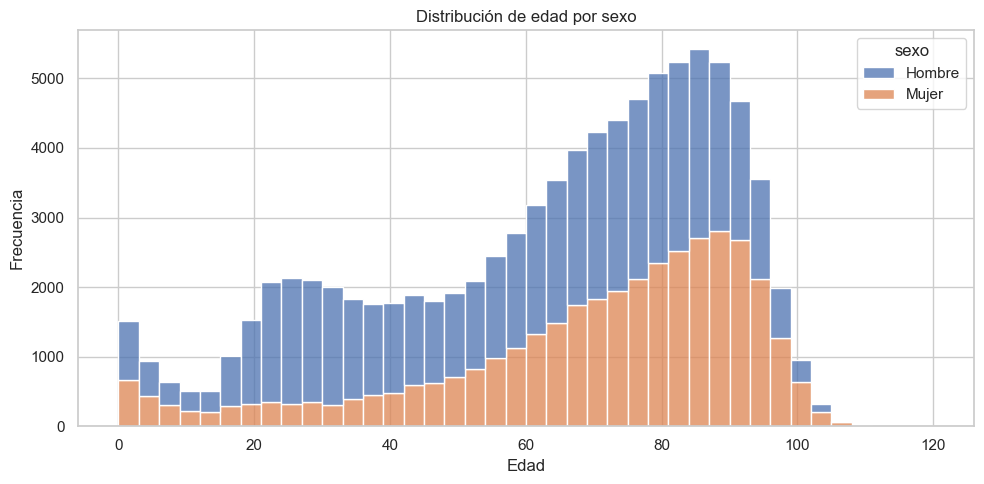

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data=df.assign(edad_num=edad_num), x='edad_num', hue='sexo', bins=40, kde=False, multiple='stack')
plt.title('Distribución de edad por sexo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## 10. Provincias de residencia y fallecimiento

Aquí analizamos:
- En qué provincias residían las personas (`prov_res`).
- En qué provincias fallecieron (`prov_fall`).
- Si hay diferencias importantes entre residencia y lugar de fallecimiento (por ejemplo, personas que mueren en otra provincia).

In [21]:
prov_res_counts = df['prov_res'].value_counts(dropna=False)
prov_res_counts

prov_res
Guayas                            26178
Pichincha                         13613
Manabí                             8657
Los Ríos                           5569
El Oro                             4163
Azuay                              4020
Tungurahua                         3074
Chimborazo                         2864
Loja                               2771
Esmeraldas                         2638
Imbabura                           2519
Santo Domingo de los Tsáchilas     2449
Cotopaxi                           2278
Santa Elena                        1881
Cañar                              1451
Bolívar                            1057
Carchi                              911
Sucumbíos                           889
Morona Santiago                     726
Orellana                            685
Napo                                499
Pastaza                             446
Zamora Chinchipe                    425
Galapagos                            65
Exterior                       

In [22]:
prov_fall_counts = df['prov_fall'].value_counts(dropna=False)
prov_fall_counts

prov_fall
Guayas                            27091
Pichincha                         14492
Manabí                             8378
Los Ríos                           5054
Azuay                              4407
El Oro                             4144
Tungurahua                         3071
Santo Domingo de los Tsáchilas     2835
Loja                               2749
Chimborazo                         2740
Imbabura                           2433
Esmeraldas                         2377
Cotopaxi                           2029
Santa Elena                        1733
Cañar                              1235
Bolívar                             885
Sucumbíos                           854
Carchi                              797
Morona Santiago                     630
Orellana                            620
Napo                                499
Pastaza                             422
Zamora Chinchipe                    340
Galápagos                            62
Name: count, dtype: int64

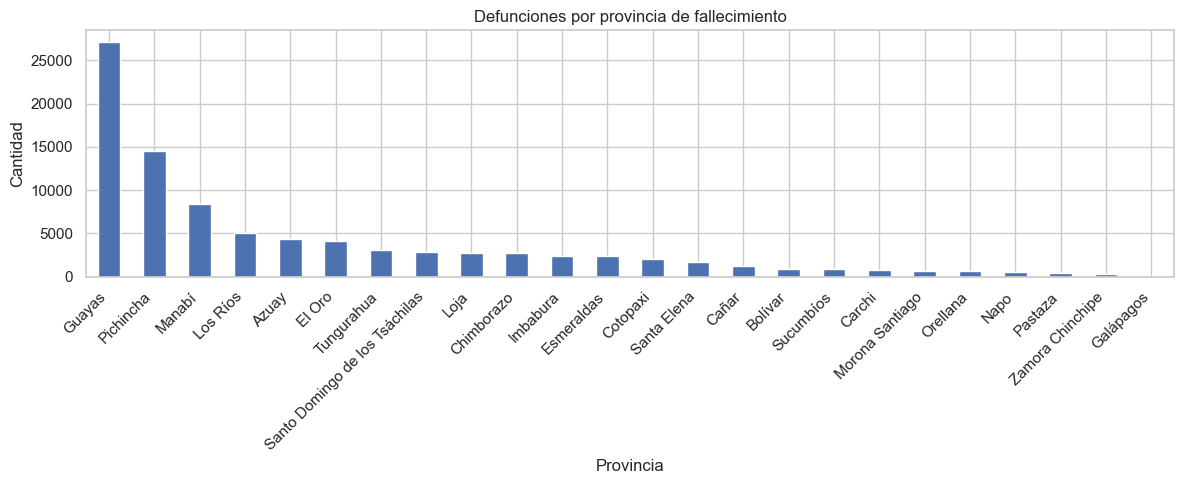

In [23]:
plt.figure(figsize=(12,5))
prov_fall_counts.plot(kind='bar')
plt.title('Defunciones por provincia de fallecimiento')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

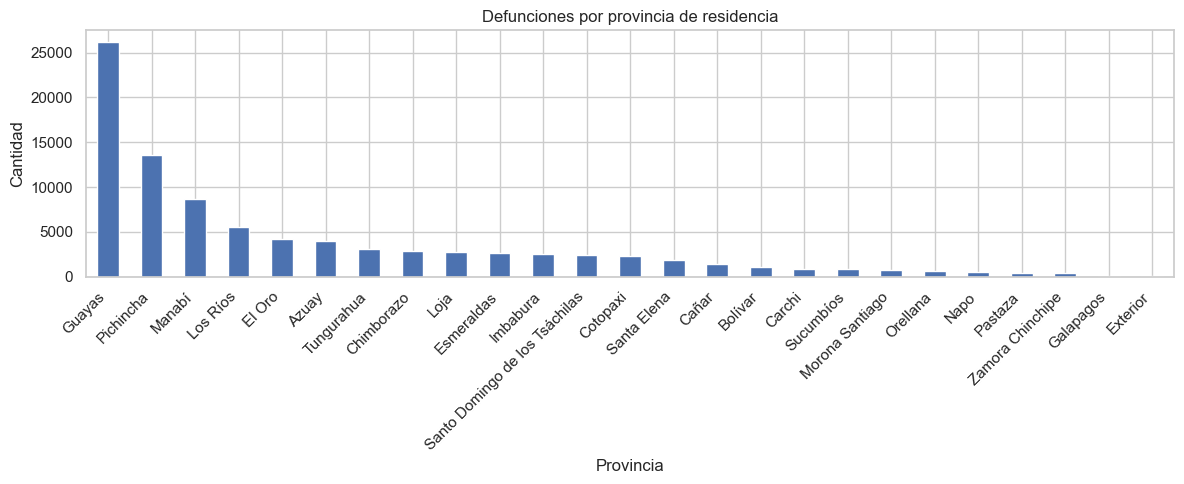

In [24]:
plt.figure(figsize=(12,5))
prov_res_counts.plot(kind='bar')
plt.title('Defunciones por provincia de residencia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

También podemos ver una tabla que cruza provincia de residencia con provincia de fallecimiento, para ver cuántas personas mueren en su misma provincia o en otra.

In [25]:
tabla_res_fall = pd.crosstab(df['prov_res'], df['prov_fall'])
tabla_res_fall.head()

prov_fall,Azuay,Bolívar,Carchi,Cañar,Chimborazo,Cotopaxi,El Oro,Esmeraldas,Galápagos,Guayas,...,Morona Santiago,Napo,Orellana,Pastaza,Pichincha,Santa Elena,Santo Domingo de los Tsáchilas,Sucumbíos,Tungurahua,Zamora Chinchipe
prov_res,,,,,,,,,,,,,,,,,,,,,
Azuay,3911,0,1,22,1,0,52,0,1,17,...,4,0,0,0,2,0,0,0,0,0
Bolívar,1,852,0,1,16,2,0,0,0,40,...,0,0,0,0,66,0,5,1,23,0
Carchi,0,0,778,0,0,0,2,3,0,0,...,0,0,0,0,74,1,0,0,1,0
Cañar,201,0,1,1166,2,0,1,0,0,75,...,0,0,0,0,2,0,0,0,0,0
Chimborazo,12,4,0,6,2648,4,2,0,0,36,...,1,0,1,0,124,1,2,0,21,0


## 11. Lugar de ocurrencia de la defunción

Analizamos dónde se registran las muertes:
- Casa.
- Establecimientos del Ministerio de Salud.
- Establecimientos del IESS.
- Clínicas y hospitales privados.
- Otros lugares.

Esto es importante para entender el acceso al sistema de salud.

In [26]:
lugar_counts = df['lugar_ocur'].value_counts(dropna=False)
lugar_counts

lugar_ocur
Casa                                            40655
Establecimientos del Ministerio de Salud        19980
Otro                                            10725
Establecimientos del IESS                        8724
Hospital, clínica o consultorio privado          8117
Establecimientos de la Junta de Beneficencia      994
Otros establecimientos públicos                   517
Sin información                                   165
Name: count, dtype: int64

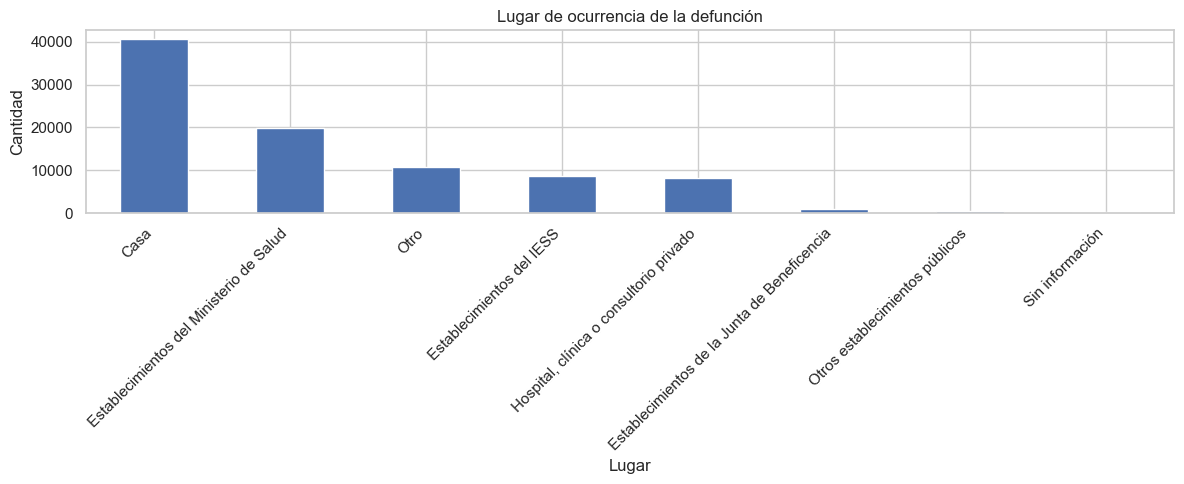

In [27]:
plt.figure(figsize=(12,5))
lugar_counts.plot(kind='bar')
plt.title('Lugar de ocurrencia de la defunción')
plt.xlabel('Lugar')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

También podemos cruzar lugar de ocurrencia con sexo y con área (urbano/rural). Esto ayuda a ver si hay patrones distintos en distintos contextos.

In [28]:
pd.crosstab(df['sexo'], df['lugar_ocur'], normalize='index')

lugar_ocur,Casa,Establecimientos de la Junta de Beneficencia,Establecimientos del IESS,Establecimientos del Ministerio de Salud,"Hospital, clínica o consultorio privado",Otro,Otros establecimientos públicos,Sin información
sexo,,,,,,,,
Hombre,0.408727,0.009855,0.094446,0.221408,0.078398,0.180283,0.005062,0.001821
Mujer,0.512646,0.012725,0.100689,0.223542,0.106787,0.035048,0.006707,0.001856


In [29]:
pd.crosstab(df['area_fall'], df['lugar_ocur'], normalize='index')

lugar_ocur,Casa,Establecimientos de la Junta de Beneficencia,Establecimientos del IESS,Establecimientos del Ministerio de Salud,"Hospital, clínica o consultorio privado",Otro,Otros establecimientos públicos,Sin información
area_fall,,,,,,,,
Rural,0.774252,0.000000,0.003453,0.043456,0.024822,0.150433,0.000847,0.002736
Urbano,0.386043,0.013337,0.116346,0.259138,0.103800,0.112924,0.006763,0.001650


## 12. Área urbana/rural

Vemos cómo se reparten las defunciones entre áreas urbanas y rurales, tanto por residencia como por lugar de fallecimiento.

In [30]:
df['area_res'].value_counts(dropna=False)

area_res
Urbano    68745
Rural     21132
Name: count, dtype: int64

In [31]:
df['area_fall'].value_counts(dropna=False)

area_fall
Urbano    74528
Rural     15349
Name: count, dtype: int64

## 13. Variables relacionadas con muertes violentas y autopsias

Analizamos las columnas:
- `mor_viol`: si la muerte fue violenta.
- `lug_viol`: lugar donde ocurrió la violencia.
- `autopsia`: si se realizó autopsia.

Esto ayuda a entender mejor el registro de causas externas y muertes por agresiones o accidentes.

In [32]:
df['mor_viol'].value_counts(dropna=False)

mor_viol
                           73833
Homicidios                  7456
Accidente de transporte     4051
Otros accidentes            2587
Suicidio                    1177
Indeterminada                657
Otras cuasas externas        116
Name: count, dtype: int64

In [33]:
df['lug_viol'].value_counts(dropna=False)

lug_viol
                                             73833
Calle o carreteras                            9358
Vivienda                                      2422
Sin información                               2072
Otro                                          1023
Área comercial o de servicio                   399
Área agrícola                                  352
Institución residencial                        152
Areas deportivas                                96
Escuela u oficina pública                       88
Áreas industriales(taller,fábrica u obra)       82
Name: count, dtype: int64

In [34]:
df['autopsia'].value_counts(dropna=False)

autopsia
No                 36260
Sin información    35156
Si                 15448
                    3013
Name: count, dtype: int64

Podemos cruzar estas variables con `lugar_ocur` para ver qué tipos de muertes violentas están más asociadas a ciertos lugares.

In [35]:
pd.crosstab(df['mor_viol'], df['lugar_ocur'], normalize='index')

lugar_ocur,Casa,Establecimientos de la Junta de Beneficencia,Establecimientos del IESS,Establecimientos del Ministerio de Salud,"Hospital, clínica o consultorio privado",Otro,Otros establecimientos públicos,Sin información
mor_viol,,,,,,,,
,0.525944,0.012420,0.109179,0.226389,0.101215,0.015968,0.006650,0.002235
Accidente de transporte,0.017280,0.007899,0.051345,0.231301,0.046161,0.644285,0.001728,0.000000
Homicidios,0.048015,0.000671,0.024544,0.196620,0.014351,0.715397,0.000402,0.000000
Indeterminada,0.111111,0.007610,0.050228,0.187215,0.059361,0.581431,0.003044,0.000000
Otras cuasas externas,0.129310,0.017241,0.112069,0.267241,0.120690,0.353448,0.000000,0.000000
Otros accidentes,0.253576,0.011596,0.079629,0.220719,0.110553,0.319289,0.004639,0.000000
Suicidio,0.553101,0.002549,0.016992,0.116398,0.009346,0.299915,0.001699,0.000000


## 14. Calidad de fechas de nacimiento y fallecimiento

Sabemos que hay valores como `9999/99/99` en `fecha_nac`, que no son fechas reales.
Aquí revisamos:
- Cuáles son las fechas más frecuentes de nacimiento y fallecimiento.
- Qué porcentaje de fechas no se puede convertir correctamente a una fecha válida.

Esto todavía no es limpieza, solo detección de posibles problemas.

In [36]:
df['fecha_nac'].value_counts(dropna=False).head(20)

fecha_nac
9999/99/99    263
15/8/1940      16
19/7/2023      16
24/2/2023      16
20/1/2023      16
1/8/1931       15
4/8/2023       15
1/10/1952      15
14/2/2023      15
10/4/2023      15
19/5/2023      14
15/12/1939     14
12/1/2023      14
15/10/1940     14
15/8/1938      13
14/2/1942      13
8/8/1936       13
20/12/1934     13
20/11/1939     13
12/6/1957      13
Name: count, dtype: int64

In [55]:
df['fecha_fall'].value_counts(dropna=False).head(60)

fecha_fall
26/3/2023     322
1/1/2023      305
3/12/2023     288
17/5/2023     285
15/5/2023     284
20/11/2023    284
4/1/2023      282
22/3/2023     282
4/6/2023      281
30/10/2023    279
19/6/2023     277
18/6/2023     277
2/12/2023     275
7/5/2023      274
10/6/2023     273
25/6/2023     273
15/7/2023     273
4/11/2023     272
4/4/2023      272
26/12/2023    271
23/10/2023    271
11/3/2023     271
16/7/2023     270
6/11/2023     269
17/12/2023    269
4/10/2023     268
30/9/2023     268
26/11/2023    267
18/12/2023    267
6/5/2023      266
2/9/2023      266
10/4/2023     266
22/1/2023     266
27/3/2023     265
1/12/2023     265
12/11/2023    265
9/3/2023      264
19/2/2023     264
20/12/2023    264
20/3/2023     264
24/4/2023     264
23/7/2023     263
31/3/2023     263
10/12/2023    263
1/4/2023      263
2/2/2023      262
22/11/2023    262
14/1/2023     261
15/10/2023    261
8/7/2023      261
5/5/2023      261
19/11/2023    261
18/7/2023     260
4/5/2023      260
24/6/2023     260

In [38]:
fecha_nac_parsed = pd.to_datetime(df['fecha_nac'], format='%d/%m/%Y', errors='coerce')
fecha_fall_parsed = pd.to_datetime(df['fecha_fall'], format='%d/%m/%Y', errors='coerce')

fecha_nac_parsed.isna().mean(), fecha_fall_parsed.isna().mean()

(np.float64(0.0032933898550240883), np.float64(1.1126317077784083e-05))

## 15. Exploración de causas de muerte (agrupadas)

Las causas de muerte están codificadas en varios niveles:
- `causa4`: código detallado tipo CIE-10 con texto.
- `causa`: una agrupación más general.
- `lc1`, `causa103`, `causa80`, `causa67A`, `causa67B`: distintos niveles de agrupación.

Empezamos viendo las causas agrupadas en `causa103`, que son más manejables para análisis globales.

In [60]:
df['causa103'].value_counts(dropna=False).head(60)

causa103
067 Enfermedades isquémicas del corazón                                                                                   13599
102 Agresiones                                                                                                             7471
069 Enfermedades Cerebro vasculares                                                                                        4701
052 Diabetes mellitus                                                                                                      4552
096 Accidentes de transporte                                                                                               4075
074 Neumonia                                                                                                               3843
066 Enfermedades hipertensivas                                                                                             3608
094 Sintomas, signos y hallazgos anormales  clínicos yde laboratorio  no clasificados en otra p

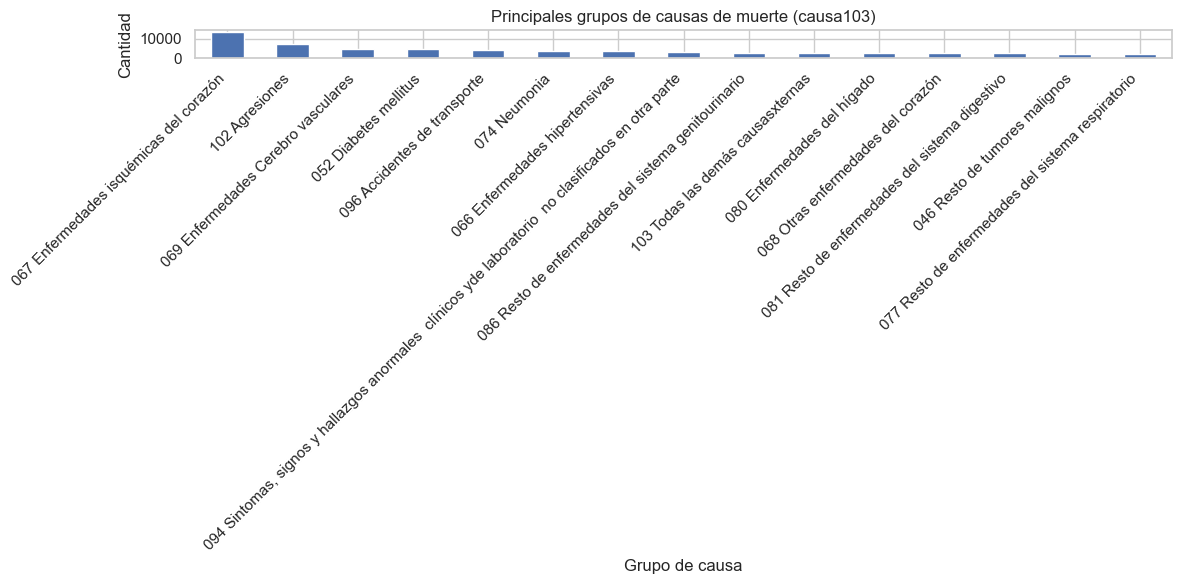

In [40]:
plt.figure(figsize=(12,6))
df['causa103'].value_counts().head(15).plot(kind='bar')
plt.title('Principales grupos de causas de muerte (causa103)')
plt.xlabel('Grupo de causa')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

También podemos ver cuántos grupos distintos hay en cada nivel de causa. Esto nos ayuda a decidir qué nivel usar como objetivo en modelos futuros.

In [41]:
df[['causa4', 'causa', 'lc1', 'causa103', 'causa80', 'causa67A', 'causa67B']].nunique()

causa4      2439
causa        875
lc1           69
causa103      84
causa80       73
causa67A      17
causa67B      54
dtype: int64

## 16. Causas de muerte por provincia (vista general)

Sin entrar aún en un análisis profundo, miramos cómo se reparte la causa principal (`causa103`) en algunas provincias clave.
Esto nos puede dar pistas sobre posibles temas de estudio más adelante (por ejemplo, diferencias entre Guayas y Pichincha).

In [42]:
provincias_clave = ['Guayas', 'Pichincha']

for prov in provincias_clave:
    sub = df[df['prov_fall'] == prov]
    print(f"\nTop 10 causas (causa103) en {prov}:")
    display(sub['causa103'].value_counts().head(10))


Top 10 causas (causa103) en Guayas:


causa103
067 Enfermedades isquémicas del corazón                 5187
102 Agresiones                                          3425
052 Diabetes mellitus                                   1639
069 Enfermedades Cerebro vasculares                     1326
074 Neumonia                                            1203
096 Accidentes de transporte                            1114
086 Resto de enfermedades del sistema genitourinario    1026
080 Enfermedades del hígado                              852
103 Todas las demás causasxternas                        681
066 Enfermedades hipertensivas                           665
Name: count, dtype: int64


Top 10 causas (causa103) en Pichincha:


causa103
067 Enfermedades isquémicas del corazón                 2396
069 Enfermedades Cerebro vasculares                      695
074 Neumonia                                             613
096 Accidentes de transporte                             603
081 Resto de enfermedades del sistema digestivo          592
046 Resto de tumores malignos                            552
077 Resto de enfermedades del sistema respiratorio       516
068 Otras enfermedades del corazón                       496
103 Todas las demás causasxternas                        478
086 Resto de enfermedades del sistema genitourinario     405
Name: count, dtype: int64

## 17. Detección de valores especiales y posibles problemas

En esta sección buscamos explícitamente:
- Valores como `'Sin información'`.
- Cadenas vacías (`''`).
- Valores que parecen códigos especiales (por ejemplo fechas falsas).

Esto nos sirve para listar problemas que luego atacaremos en la fase de limpieza.

In [43]:
valores_especiales = ['Sin información', '', ' ', '9999/99/99']

conteos_especiales = {}
for col in df.columns:
    serie = df[col].fillna('')
    conteos_col = {ve: (serie == ve).sum() for ve in valores_especiales}
    conteos_especiales[col] = conteos_col

pd.DataFrame(conteos_especiales).T

,Sin información,,,9999/99/99
Numeración,0,0,0,0
prov_insc,0,0,331,0
cant_insc,0,0,331,0
parr_insc,0,0,331,0
anio_insc,0,0,331,0
mes_insc,0,0,331,0
dia_insc,0,0,331,0
fecha_insc,0,0,331,0
nac_fall,222,0,0,0
cod_pais,0,0,0,0


## 18. Resumen

En este punto ya tenemos una visión bastante detallada del dataset:
- Sabemos qué columnas hay y cómo están organizadas.
- Conocemos la distribución de años de fallecimiento y de inscripción.
- Vemos cómo se distribuyen las edades, el sexo, la etnia y otras variables demográficas.
- Observamos las provincias más afectadas y la diferencia entre residencia y lugar de fallecimiento.
- Vemos dónde ocurre la muerte (casa, hospitales públicos, IESS, privados, etc.).
- Identificamos cómo se agrupan las causas de muerte y cuántos grupos distintos hay.
- Detectamos valores sospechosos o especiales que habrá que tratar en la limpieza.

En el siguiente paso, podremos usar esta información para:
- Decidir qué subset de años usar (por ejemplo, solo 2023).
- Definir reglas claras de limpieza para fechas, edades y valores como `Sin información`.
- Escoger un nivel de causa de muerte (por ejemplo `causa103`) como objetivo para modelos.
- Diseñar el problema concreto que queremos estudiar y cómo se prestará para aprendizaje federado.